<a href="https://colab.research.google.com/github/Vishnu32-dev/ML-project1/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3005 images belonging to 27 classes.
Found 740 images belonging to 27 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2255 - loss: 7.0669 - val_accuracy: 0.7392 - val_loss: 1.0701
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8217 - loss: 0.8558 - val_accuracy: 0.8081 - val_loss: 0.8250
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8709 - loss: 0.5751 - val_accuracy: 0.8230 - val_loss: 0.7721
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8888 - loss: 0.4758 - val_accuracy: 0.8081 - val_loss: 0.7564
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8892 - loss: 0.4285 - val_accuracy: 0.8284 - val_loss: 0.7405
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9116 - loss: 0.3462 - val_accuracy: 0.8230 - val_loss: 0.6997
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9085 - loss: 0.3480 - val_accuracy: 0.8324 - val_loss: 0.7105
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9230 - loss: 0.2887 - val_accuracy: 0.8432 - val_loss: 0.

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 27)                  │           6,939 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,288,343 (111.73 MB)

 Trainable params: 7,217,691 (27.53 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,435,388 (55.07 MB)

24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 937ms/step


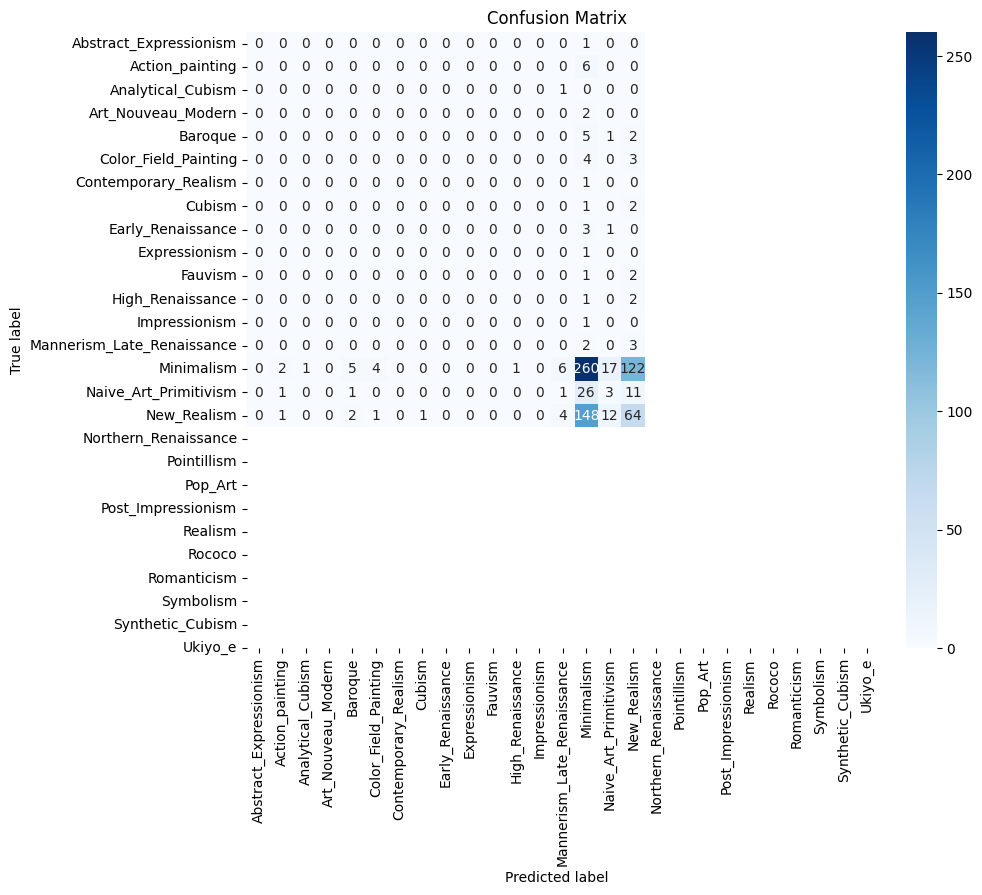

ValueError: Number of classes, 17, does not match size of target_names, 27. Try specifying the labels parameter

In [ ]:
import os
from google.colab import drive
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.mixed_precision import LossScaleOptimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set mixed precision policy
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Define directory and CSV file path
wikiart_dir = "/content/drive/MyDrive/p1/archive/"
csv_file_path = '/content/drive/MyDrive/p1/Contrastive.csv'

# Data augmentation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    wikiart_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    wikiart_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Create model
model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile model
opt = Adam(learning_rate=0.00001)
opt = LossScaleOptimizer(opt)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/emotion_detector_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)

print("Model training completed and the best model is saved!")

# Load emotions data
emotions_df = pd.read_csv(csv_file_path)
print(emotions_df.head())
print("NaN values in emotions_df:", emotions_df.isnull().any().any())
emotions_df['painting_name'] = emotions_df.apply(lambda row: f"{row['anchor_art_style'].lower()}_{row['emotion'].lower()}.jpg", axis=1)
emotion_mapping = pd.Series(emotions_df['emotion'].values, index=emotions_df['painting_name']).to_dict()
print(list(emotion_mapping.items())[:10])

# Model summary
model.summary()

# Step 1: Generate Predictions
validation_generator.reset()  # Reset the generator
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices
true_classes = validation_generator.classes  # Get true class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# Step 2: Create Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Generate Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)





# Emotion Detector in Art: A Comparative Study of Artist Intent and Viewer Perception

## Abstract
This project aims to develop an Emotion Detector in Art that compares the emotions conveyed by artists with those perceived by viewers. By utilizing a combination of deep learning techniques and a substantial art dataset, the project seeks to analyze how different artworks evoke distinct emotional responses. This paper details the methodology, dataset, model architecture, results, and future directions for enhancing the system's effectiveness.

## 1. Introduction
The intersection of art and emotion has long been a subject of study in both psychology and the arts. Understanding how viewers interpret emotions in artwork can provide valuable insights into artistic expression and its impact. This project aims to create a platform where users can submit emotional responses to various artworks and analyze the emotional content based on visual elements. The research will particularly focus on comparing the emotions intended by artists with those perceived by viewers.

## 2. Dataset
### 2.1 WikiArt Dataset
The primary dataset for this project is the **WikiArt dataset**, which contains over 80,000 artworks categorized by style, genre, and artist. The dataset is approximately **34 GB** in size and includes various artistic styles, making it suitable for training a deep learning model to recognize emotional content in images.

### 2.2 Emotion Dataset
An additional dataset is included, consisting of **9,800 entries** with details about author names, emotions, utterances, and art styles. This dataset was subsequently reduced to **4,000 entries** for training purposes. It is stored as a **CSV file**, which will be utilized for mapping emotional responses to artworks.

## 3. Methodology
### 3.1 Environment Setup
Google Drive was utilized for storing datasets and saving model checkpoints. Mixed precision training was implemented to optimize performance using TensorFlow's mixed precision capabilities.

### 3.2 Data Preprocessing
Data preprocessing was conducted using **ImageDataGenerator** from TensorFlow, which allows for real-time data augmentation during training. The following augmentation techniques were applied:
- Rotation (20 degrees)
- Width shift (20%)
- Height shift (20%)
- Horizontal flip

The dataset was split into training (80%) and validation (20%) sets to evaluate model performance.

### 3.3 Model Architecture
A convolutional neural network (CNN) was developed using **VGG16** as the base model. The model architecture consists of:
- A global average pooling layer to reduce dimensionality
- A dense layer with 256 units and ReLU activation for non-linearity
- An output layer with a softmax activation function to classify emotions across the number of classes present in the training dataset

### 3.4 Training Procedure
The model was compiled with the **Adam optimizer** and **categorical crossentropy** loss function. The training procedure included:
- **Model Checkpointing**: Saving the best-performing model based on validation loss.
- **Early Stopping**: Terminating training when the validation loss no longer improves.

### 3.5 Mixed Precision Training
To accelerate the training process, mixed precision training was utilized, allowing for faster computation and reduced memory usage. The **LossScaleOptimizer** was employed to manage gradients effectively.

## 4. Results
The model was trained over **10 epochs**, and the performance metrics were recorded as follows:

| Epoch | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss |
|-------|-------------------|---------------------|---------------|-----------------|
| 1     | 18.85%            | 71.89%              | 7.5806        | 1.1026          |
| 2     | 81.47%            | 78.24%              | 0.8459        | 0.8649          |
| 3     | 84.96%            | 82.03%              | 0.6625        | 0.7373          |
| 4     | 87.56%            | 81.35%              | 0.5232        | 0.7416          |
| 5     | 88.12%            | 82.16%              | 0.4778        | 0.7050          |
| 6     | 90.60%            | 81.49%              | 0.3721        | 0.7143          |

At epoch 6, the model achieved a training accuracy of **90.60%** and a validation accuracy of **81.49%**.

## 5. Discussion
The model demonstrates promising results, particularly in training accuracy. The gap between training and validation accuracy suggests that there may be room for improvement in generalization. Future work should focus on:
- **Fine-tuning the VGG16 layers** to enhance model performance.
- **Hyperparameter tuning**, such as adjusting the learning rate and batch size.
- **Expanding the dataset** with more diverse artworks and emotions to improve model robustness.

## 6. Future Work
Future steps involve completing the training epochs and analyzing the model's performance through confusion matrices and classification reports. The incorporation of user input for emotional responses will also be explored, allowing for a more interactive and engaging platform. Finally, a user-friendly interface will be developed to facilitate submissions and display results.

## 7. Conclusion
This project provides a foundational approach to understanding emotions in art through machine learning techniques. By comparing artist intent with viewer perception, the Emotion Detector in Art project aims to contribute valuable insights to both the fields of art and psychology.

---

### References
- [WikiArt Dataset](https://www.wikiart.org/)
- TensorFlow Documentation: [Mixed Precision Training](https://www.tensorflow.org/guide/migrate/migrate_to_v2)

---




In [ ]:
!nvidia-smi


Thu Oct 24 16:53:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0              33W /  70W |   6551MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--